# TF-IDF visualisation of MWOs

Original ChatGPT Prompt:

```
Write me python code for "Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation" using the scikit-learn library. My input data is in a '.txt' file.
```

- [ChatGPT History](https://chat.openai.com/share/ab20717b-5d00-4988-ac6f-471232f8b680)
- [Topic extraction via Scikit-learn](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)



In [1]:
### Install packages

!pip install scikit-learn sklearn matplotlib

  Using cached scikit_learn-1.3.0-cp310-cp310-win_amd64.whl (9.2 MB)
  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached scipy-1.11.2-cp310-cp310-win_amd64.whl (44.0 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.42.1-cp310-cp310-win_amd64.whl (2.1 MB)


You should consider upgrading via the 'C:\Users\00040628\GitHub2023\tfidf\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
import os
import itertools
import random
from collections import Counter
from typing import List, Tuple

In [4]:
import matplotlib.pyplot as plt

In [ ]:
# Read the input data for short text file
#with open(r"C:\Users\00040628\GitHub2023\tokenComparison\shorttext.txt", "r") as file:
#    data = list(set([l.replace("\n", "") for l in file.readlines()]))

In [5]:
## Set directory path
dir_path = os.path.abspath("") # set file path so we can find files in the class folder

# Read data in as text file


with open(f'{dir_path}/example_safety_records.txt', 'r') as f:
    data = list(set([l.replace('\n','') for l in f.readlines()]))
        
print(data[:10])

['Injured person was sleeping when he felt a stinging sensation on his right thigh area. The injured person was not concerned at the time. The bitten area became inflamed and red of the next few days. The injured person attended the Camp Medical Centre on the 26th November when he became concerned about possible infection as the wound was now painful. Sequence of events After arriving on-site on the 14th November, IP was working within the  area. Daily tasks included working with the Geo-mesh fabric consisting of 14 rolls, which has been situated within the area for approx. 3 months. The task required handling of the Geo-mesh fabric to be used in the  drains. Geo-mesh was handled by IP on multiple occasions over the course of their roster. The tasks were completed with the assistance. Due to the length of time that a white tail spider bite takes to manifest it is unknown an exact time, date and location the bite was incurred. After inspection of the injured personÃ¢â‚¬â„¢s accommodatio

In [6]:
print(f"Corpus Size: {len(data)}")

Corpus Size: 10


In [7]:
# Parameters for vectorization and number of topics
n_features = 1000
n_topics = 10
n_top_words = 20

In [8]:
def print_top_words(model, feature_names, n_top_words):
    """
    Print the top words for each topic in a given model.

    Parameters:
    - model: The trained model, should have a `components_` attribute.
    - feature_names: List of feature names, typically obtained from the vectorizer.
    - n_top_words: Number of top words to display for each topic.

    Returns:
    None. Prints the topics and their top words.
    """
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join(
            [feature_names[i] for i in topic.argsort()[: -n_top_words - 1 : -1]]
        )
        print(message)
    print()

In [9]:
def plot_top_words(model, feature_names, n_top_words, title):
    """
    Visualize the top words for each topic in a given model using bar plots.

    Parameters:
    - model (object): The trained model; should have a `components_` attribute.
    - feature_names (list): List of feature names, typically obtained from the vectorizer.
    - n_top_words (int): Number of top words to display for each topic.
    - title (str): Title for the entire visualization.

    Returns:
    None. Displays a bar plot of top words for each topic.
    """
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [10]:
# Use tf-idf features for NMF
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(data)

Extracting tf-idf features for NMF...


In [11]:
# Fit the NMF model
print("\nFitting the NMF model with tf-idf features...")
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)
print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Fitting the NMF model with tf-idf features...

Topics in NMF model:
Topic #0: person injured stinging concerned area wound camp days infection sensation red possible inflamed november time left medical attended centre painful
Topic #1: operator fell wound inflamed infection hose ground fitter felt fatally ip days crush concerned centre camp attended area injured left
Topic #2: fatally multiple fitter crush work fell working injured approximately days concerned centre felt camp ground hose attended infection area inflamed
Topic #3: ip fitter whilst hose ground service fell fatally inflamed infection felt wound injured crush concerned centre camp attended area days
Topic #4: felt approximately hose task painful area working fatally crush days injured fell concerned centre fitter ground camp infection attended inflamed
Topic #5: site medical approximately fatally attended centre injured working stinging person concerned camp days infection inflamed wound sensation possible red multiple
T

Plot NMF topics


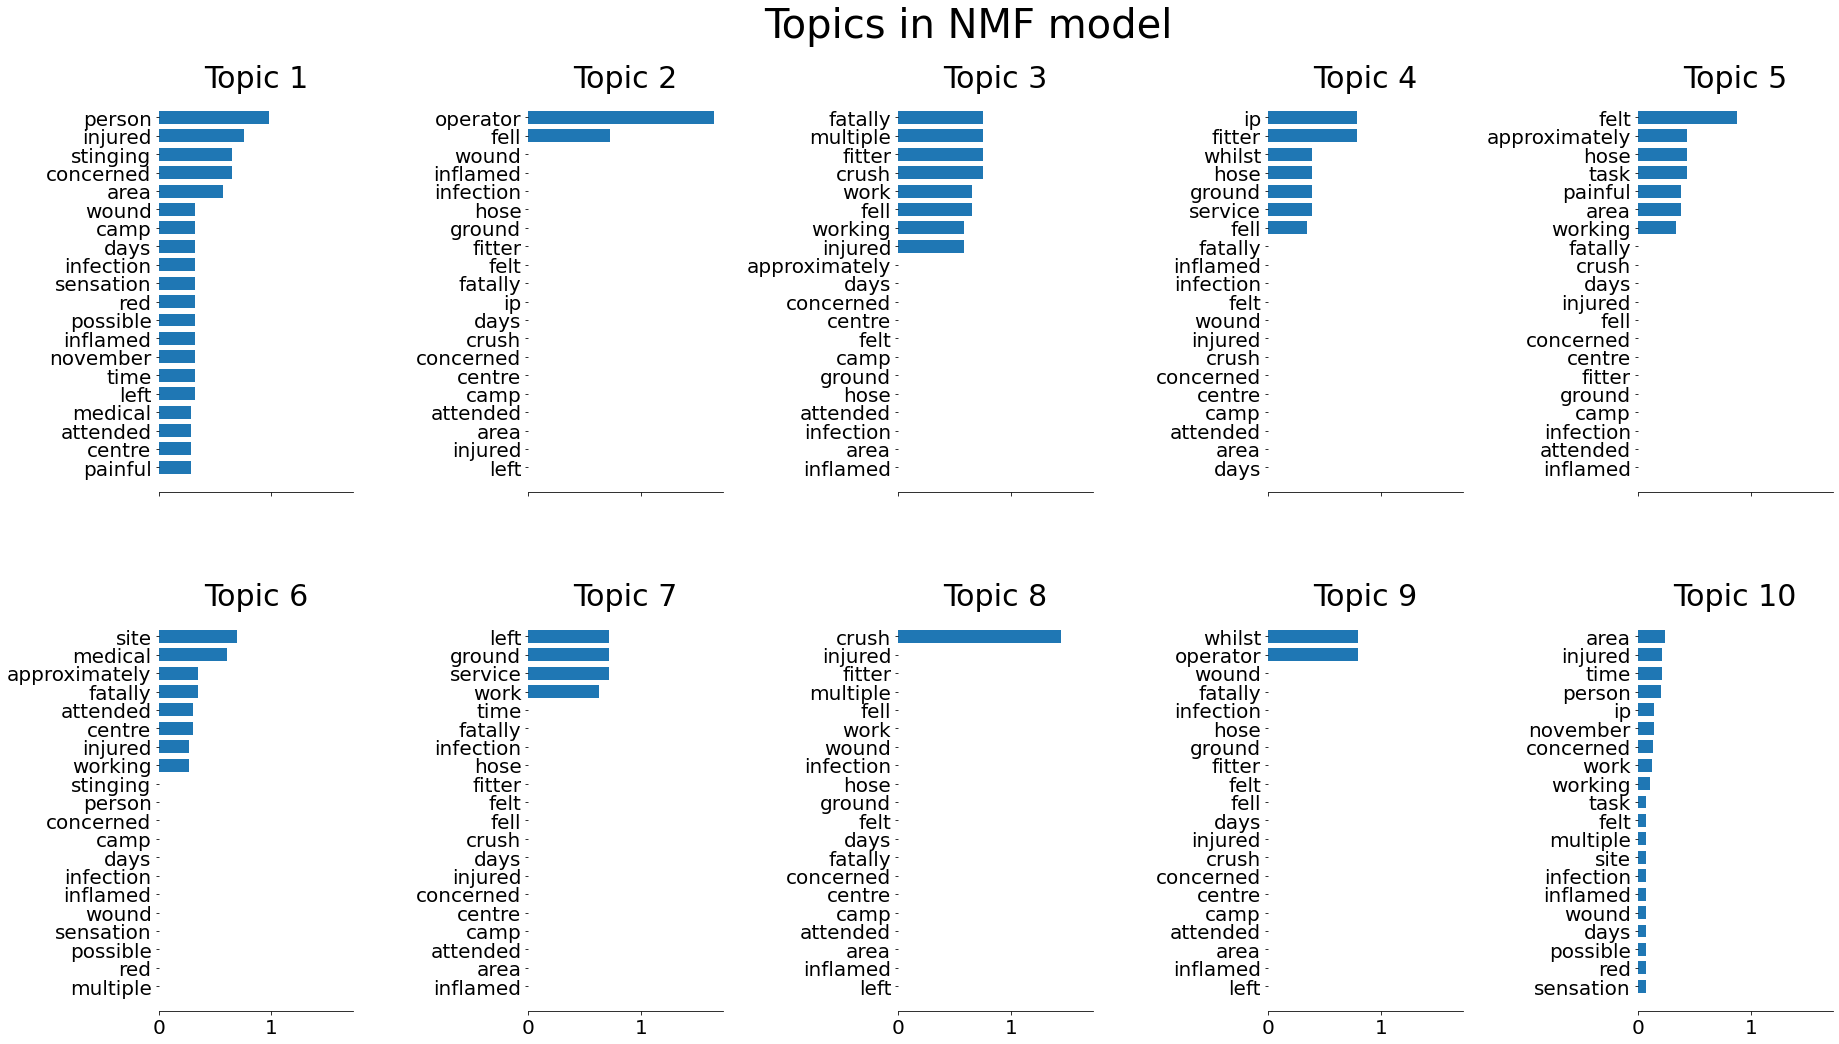

In [12]:
print("Plot NMF topics")
plot_top_words(nmf, tfidf_feature_names, n_top_words, "Topics in NMF model")

In [13]:
# Use tf-idf features for LDA
print("Extracting tf-idf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tf = tf_vectorizer.fit_transform(data)

Extracting tf-idf features for LDA...


In [14]:
# Fit the LDA model
print("Fitting LDA model with tf features...")
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

Fitting LDA model with tf features...


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [15]:
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0: infection injured attended multiple approximately felt ip crush november fatally fell hose fitter task concerned area site days stinging centre
Topic #1: work painful time area person injured infection multiple fitter red service fatally sensation wound camp site inflamed task ip fell
Topic #2: wound inflamed fell days multiple ip painful area concerned service work attended november whilst centre task fatally felt working red
Topic #3: hose approximately site camp stinging fell person work whilst red centre wound task injured possible operator felt days left ip
Topic #4: fitter crush service ip ground work fell left hose whilst fatally multiple working injured inflamed task november days painful wound
Topic #5: operator site medical fell centre fatally injured working attended approximately whilst painful concerned task work person red possible stinging sensation
Topic #6: injured area person concerned time stinging felt painful working november infection ip centre red infla

Plot LDA topics


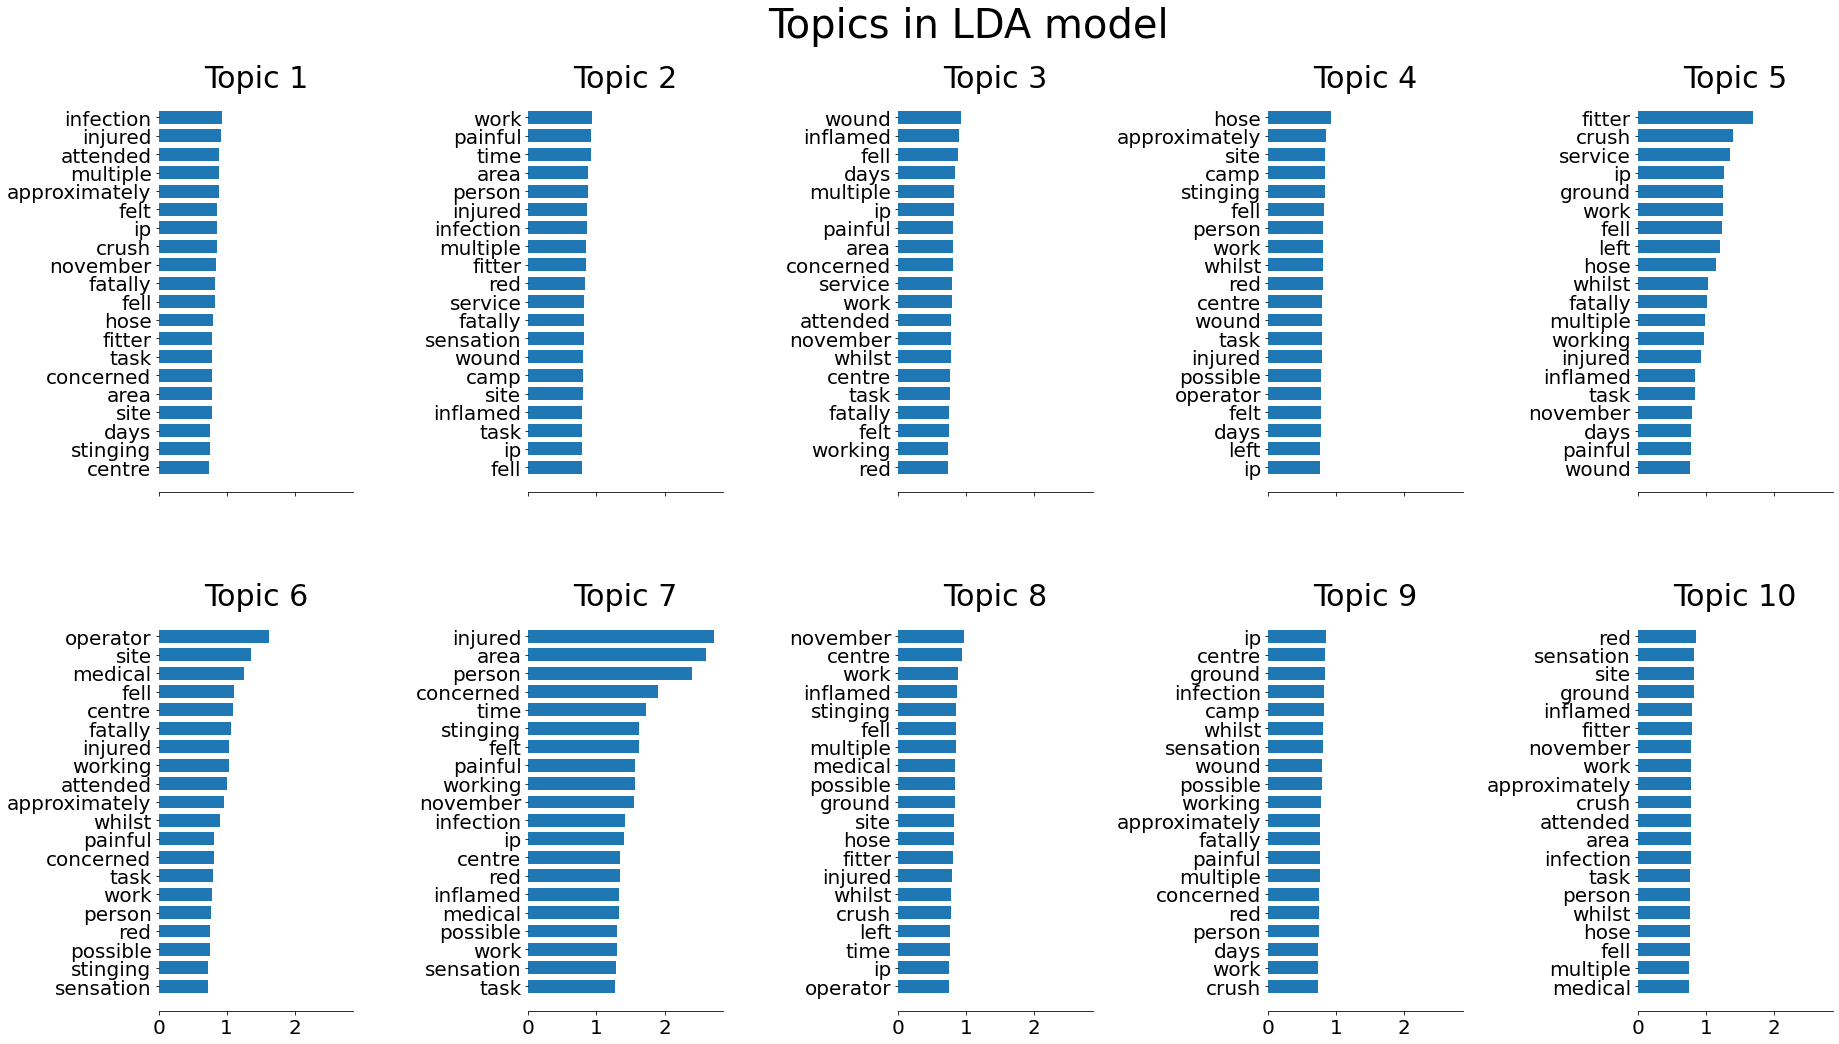

In [16]:
print("Plot LDA topics")
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")